Шишка Антон

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()

170498071/170498071 [==============================] - 11s 0us/step


Підібрати оптимальну кількість шарів, функції активації, кількіть епох навчання, розмір bath_size.

In [3]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Навчити модель

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Оцінка моделі
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
391/391 [==============================] - 73s 182ms/step - loss: 1.6716 - accuracy: 0.3897 - val_loss: 1.4307 - val_accuracy: 0.4937
Epoch 2/10
391/391 [==============================] - 69s 176ms/step - loss: 1.2917 - accuracy: 0.5383 - val_loss: 1.2294 - val_accuracy: 0.5558
Epoch 3/10
391/391 [==============================] - 68s 174ms/step - loss: 1.1293 - accuracy: 0.6017 - val_loss: 1.0715 - val_accuracy: 0.6242
Epoch 4/10
391/391 [==============================] - 68s 175ms/step - loss: 1.0151 - accuracy: 0.6455 - val_loss: 0.9902 - val_accuracy: 0.6575
Epoch 5/10
391/391 [==============================] - 77s 197ms/step - loss: 0.9310 - accuracy: 0.6769 - val_loss: 0.9544 - val_accuracy: 0.6705
Epoch 6/10
391/391 [==============================] - 69s 177ms/step - loss: 0.8627 - accuracy: 0.7007 - val_loss: 0.9186 - val_accuracy: 0.6760
Epoch 7/10
391/391 [==============================] - 70s 178ms/step - loss: 0.8067 - accuracy: 0.7197 - val_loss: 0.8921 - val_ac

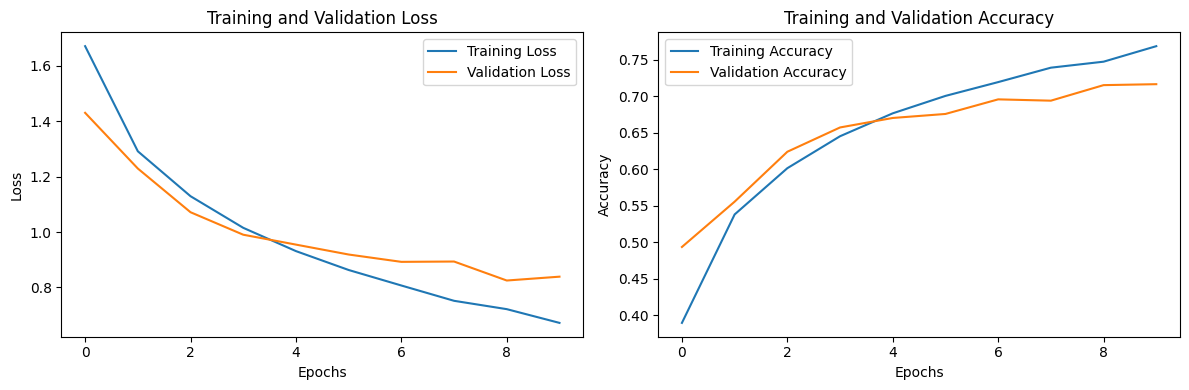

In [5]:
# Графіки функції втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Виснонок**

Нейронна мережа була успішно навчена. Це підтверджується тим, що як показники точності, так і втрати знижуються з кожним епохою навчання.
На початку навчання втрати є високими, оскільки нейронна мережа ще не навчилася розпізнавати закономірності в даних. Однак з кожним епохою навчання мережа стає все кращою в цьому, і втрати відповідно зменшуються.